In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns 

In [33]:
import os
iris =pd.read_csv('Iris.csv', index_col=0)
iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

In [34]:
iris[np.random.rand(150,5)<0.05]=np.nan

In [35]:
# Réaliser les premiers affichages
display(iris.head(5))
display(iris.shape) ##(nombre ligne, nombre colonne)
display(iris.describe()) 

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             NaN           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

(150, 5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     141.000000    141.000000     144.000000    143.000000
mean        5.847518      3.038298       3.709722      1.218881
std         0.821895      0.430392       1.750657      0.760277
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.575000      0.300000
50%         5.800000      3.000000       4.250000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [36]:
# On s'intéresse aux donnés manquantes... 
display(iris.isnull().sum())

iris1 = iris.dropna()  

##Nombre de données manquante pour chaque attribut dans iris
SLNan = iris.SepalLengthCm.isnull().sum()
SWNan = iris.SepalWidthCm.isnull().sum()
PLNan = iris.PetalLengthCm.isnull().sum()
PWNan = iris.PetalWidthCm.isnull().sum()

display(iris1.isnull().sum())

nbrExempleSupp = SLNan + SWNan + PLNan + PWNan
display(nbrExempleSupp) ##Nombre de ligne supprimées 


SepalLengthCm    9
SepalWidthCm     9
PetalLengthCm    6
PetalWidthCm     7
Species          6
dtype: int64

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

31

Pour chaque attribut on represente sa distribution.
On utilise, pour cela, l'histogramme, la Boite à moustache, le diagramme en violon et l'estimation par fonction noyau de la densité.

/Users/DokiWarou/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/DokiWarou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/DokiWarou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

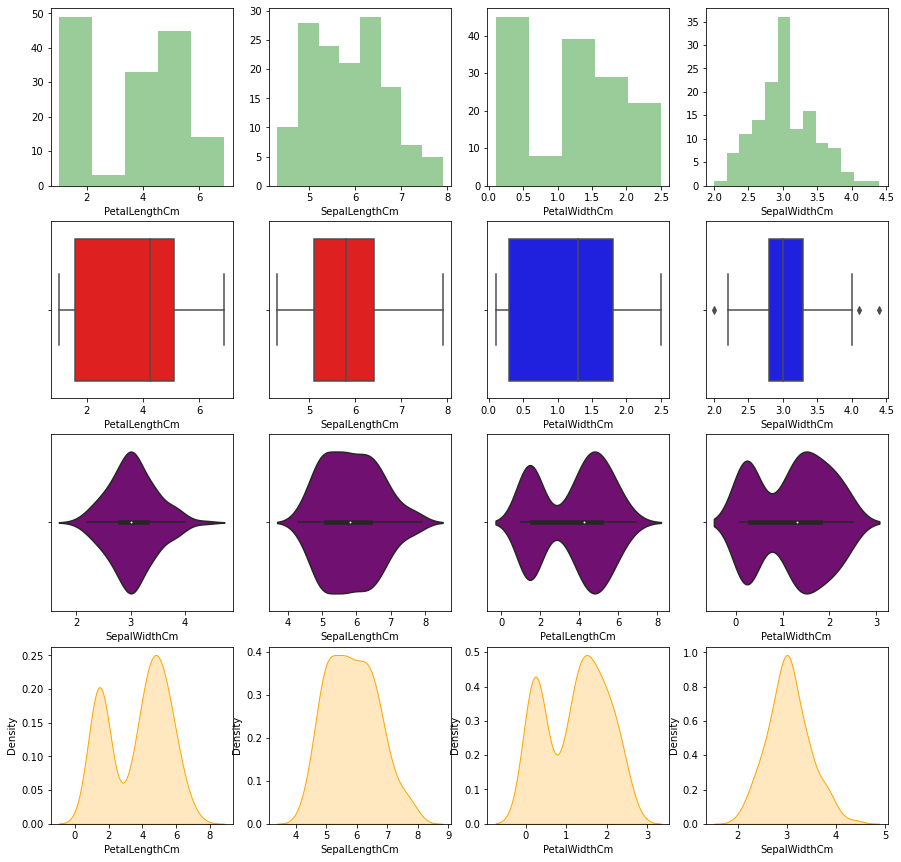

In [37]:
#histogramme 

fig,ax = plt.subplots(4, 4,figsize=(15,15))
plt.sca(ax[0,0])
sns.distplot(iris['PetalLengthCm'],color='green', kde=False)

plt.sca(ax[0,1])
sns.distplot(iris['SepalLengthCm'],color='green', kde=False)

plt.sca(ax[0,2])
sns.distplot(iris['PetalWidthCm'], color='green', kde=False)

plt.sca(ax[0,3])
sns.distplot(iris['SepalWidthCm'], color='green', kde=False)


#Boite a moustache
plt.sca(ax[1,0])
sns.boxplot(iris['PetalLengthCm'],color='red')

plt.sca(ax[1,1])
sns.boxplot(iris['SepalLengthCm'], color='red')

plt.sca(ax[1,2])
sns.boxplot(iris['PetalWidthCm'], color='blue')

plt.sca(ax[1,3])
sns.boxplot(iris['SepalWidthCm'], color='blue')




#Diagramme en violon
plt.sca(ax[2,0])
sns.violinplot(iris['SepalWidthCm'], color='purple')

plt.sca(ax[2,1])
sns.violinplot(iris['SepalLengthCm'], color='purple')

plt.sca(ax[2,2])
sns.violinplot(iris['PetalLengthCm'], color='purple')

plt.sca(ax[2,3])
sns.violinplot(iris['PetalWidthCm'], color='purple')



#Estimation par fonction noyau de la densite
plt.sca(ax[3,0])
sns.kdeplot(data=iris['PetalLengthCm'],color='orange', shade =True)

plt.sca(ax[3,1])
sns.kdeplot(data=iris['SepalLengthCm'],color='orange', shade=True)

plt.sca(ax[3,2])
sns.kdeplot(data=iris['PetalWidthCm'],color='orange', shade=True)

plt.sca(ax[3,3])
sns.kdeplot(data=iris['SepalWidthCm'],color='orange', shade=True)



# Creation d'ensemble
On va, dans cette partie, diviser l'ensemble en trois(3) : 
* L'ensemble d'apprentissage Representé par iris_train et qui represente 70% de l'ensemble des données.
* L'ensemble de validation : iris_validation qui representera 10% de l'ensemble des données.
* L'ensemble de Teste : iris_test qui representera quant à lui 20% de l'ensemble des données.



# Rappel de la fonction de chacune des ensembles

* ensemble d'apprentissage : elle permet de construire le modèle
* ensemble de validation : c'est pour valider le modèle, vérifier s'il passe à l'échelle
* ensemble de test : c'est pour évaluer les performances de notre modéle; l'application

In [38]:
# import puis utilisation pour fabriquer les trois ensembles
from sklearn.model_selection import train_test_split

observation = iris1.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
classe = iris1.loc[:, ['Species']]

train_X, test1_X, train_Y, test1_Y = train_test_split(observation, classe, train_size=0.70, random_state=42)
validation_X, test_X, validation_Y, test_Y = train_test_split(test1_X, test1_Y, train_size=0.66, random_state=42)

display(len(train_X))
display(len(validation_X))
display(len(test_X))
display(len(iris1))

79

23

12

114

On remarque que la somme des taille de train, test et validation est egal à la taille du dataframe iris.

# Mise en place d'un arbre de décision

On va travailler sur iris_train en effectuant une première coupe dessus.
Pour ce faire, on represente toutes les couples d'attributs possibles.
Pour la visualisation, on utilise le diagramme points ou points et la desité.

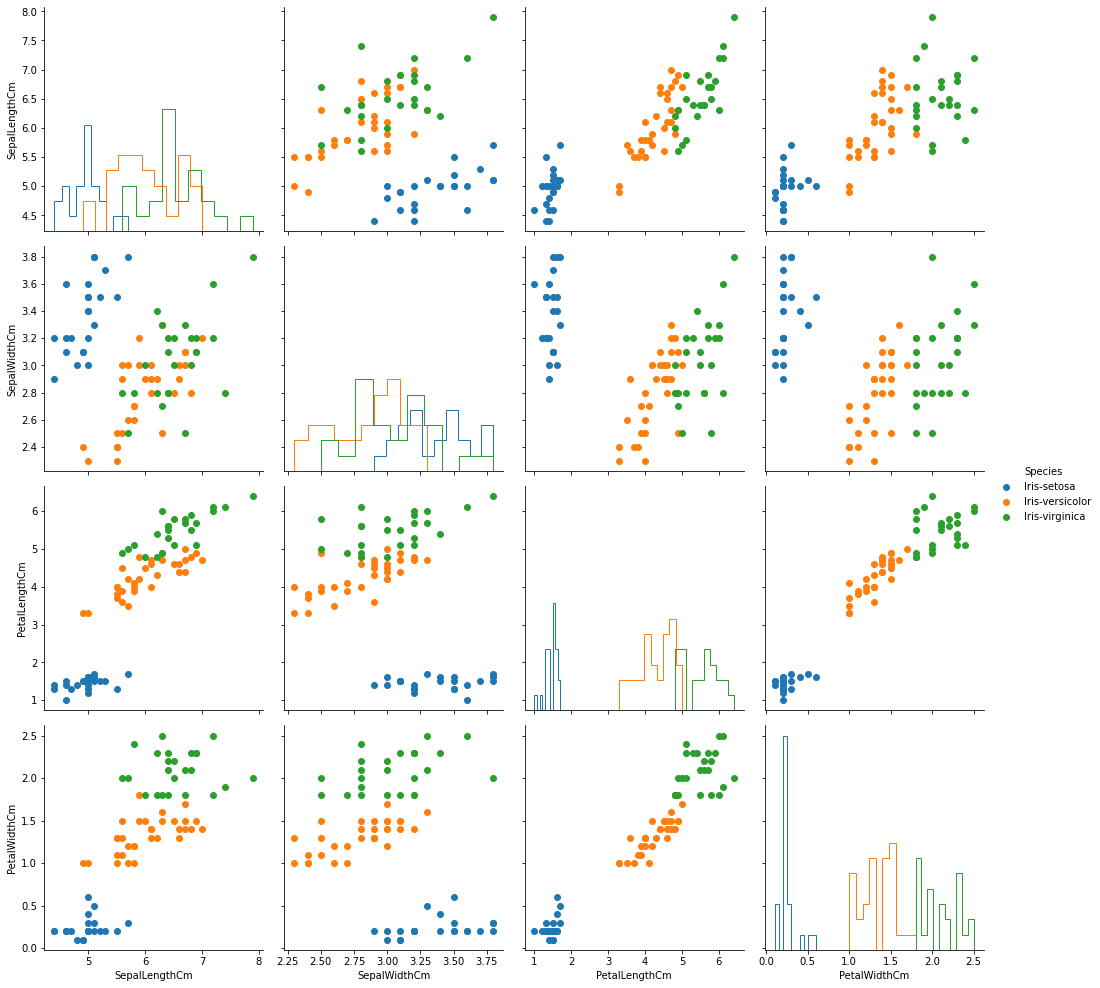

In [39]:
# Retour sur des graphiques, mais cette fois pour réaliser l'apprentissage

train = train_X.copy()
train['Species'] = train_Y.Species.copy()

g = sns.PairGrid(train,hue='Species', height = 3.5)
g = g.map_diag(plt.hist, histtype="step")
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

# Observation

On remarque que : 
* La variété aisement separable est **Iris-setosa**
* Les attributs qui permettent de la séparer des deux autres sont : **PetalLengthCm et PetalWidthCm**
* Les grapheiques qui ont permis de faire ces attributs sont : **Tous les graphes impliquant PetalLengthCm et PetalWidthCm**

# Choix de la racince de l'arbre

On utilise **PetalLenghtCm** comme attribut à la quelle on va effectuer la separation. Et la valeur du seuil que l'on va utiliser est de **2.5**.

## Fonction niveau0

La fonction niveau0 estt une fonction qui prend en entrée une description et renvoie en sortie une **estimation de la variété d'Iris** (noté '???')

In [40]:
# Fonction niveau0


def niveau0(X):
    Y = pd.DataFrame(columns= ['Resultats'])

    if (X.PetalLengthCm < 2.5):
        Y.loc[len(Y)] = ['Iris-setosa']
        
    else :
        Y.loc[len(Y)] = ['???']
        
    return Y

nv0 = pd.DataFrame({'Resultats': []})

for i in range(0, (len(train_X))):
    A = train_X.iloc[i].copy()
    nv0 = nv0.append(niveau0(A), ignore_index = True)

print(nv0)

      Resultats
0   Iris-setosa
1           ???
2           ???
3   Iris-setosa
4           ???
..          ...
74          ???
75  Iris-setosa
76          ???
77          ???
78          ???

[79 rows x 1 columns]


# Niveau suivante de l'arbre 

On va filtrer dans la base de test les elements dont la reponse par niveau0 est '???'. Cette base sera nommé base **train_2** la quelle on va la separer en deux(2) : **train_X_2, train_Y_2**.

In [41]:

train_X_2 = train_X.copy()
train_X_2.reset_index(drop = True, inplace = True)

train_Y_2 = train_Y.copy()
train_Y_2.reset_index(drop = True, inplace = True)

L = list(nv0[nv0.Resultats == 'Iris-setosa'].index.values) ##liste des index de iris-setosa dans nv0

train_X_2.drop(L, 0, inplace = True)
train_Y_2.drop(L, 0, inplace = True)

train_X_2.reset_index(drop = True, inplace = True)
train_Y_2.reset_index(drop = True, inplace = True)

train_2 = train_X_2.copy()
train_2['Species'] = train_Y_2.Species.copy()
display(train_2)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             5.7           2.6            3.5           1.0  Iris-versicolor
1             5.8           2.7            3.9           1.2  Iris-versicolor
2             4.9           2.4            3.3           1.0  Iris-versicolor
3             5.9           3.2            4.8           1.8  Iris-versicolor
4             5.5           2.4            3.7           1.0  Iris-versicolor
5             6.5           2.8            4.6           1.5  Iris-versicolor
6             7.0           3.2            4.7           1.4  Iris-versicolor
7             7.9           3.8            6.4           2.0   Iris-virginica
8             6.1           2.8            4.0           1.3  Iris-versicolor
9             6.6           2.9            4.6           1.3  Iris-versicolor
10            6.7           3.1            4.7           1.5  Iris-versicolor
11            7.2           3.6            6.1           2.5   Iris-virginica
12            6.4           3.2            5.3           2.3   Iris-virginica
13            6.7           3.3            5.7           2.1   Iris-virginica
14            6.7           2.5            5.8           1.8   Iris-virginica
15            5.6           2.9            3.6           1.3  Iris-versicolor
16            6.3           3.3            6.0           2.5   Iris-virginica
17            5.5           2.3            4.0           1.3  Iris-versicolor
18            5.6           2.8            4.9           2.0   Iris-virginica
19            6.1           3.0            4.6           1.4  Iris-versicolor
20            6.2           2.8            4.8           1.8   Iris-virginica
21            5.8           2.8            5.1           2.4   Iris-virginica
22            5.6           2.5            3.9           1.1  Iris-versicolor
23            6.7           3.1            4.4           1.4  Iris-versicolor
24            5.7           3.0            4.2           1.2  Iris-versicolor
25            5.9           3.0            4.2           1.5  Iris-versicolor
26            6.2           2.9            4.3           1.3  Iris-versicolor
27            6.0           2.9            4.5           1.5  Iris-versicolor
28            6.8           3.2            5.9           2.3   Iris-virginica
29            5.7           2.5            5.0           2.0   Iris-virginica
30            6.3           3.3            4.7           1.6  Iris-versicolor
31            6.6           3.0            4.4           1.4  Iris-versicolor
32            6.1           2.9            4.7           1.4  Iris-versicolor
33            7.2           3.2            6.0           1.8   Iris-virginica
34            6.3           2.5            4.9           1.5  Iris-versicolor
35            5.0           2.3            3.3           1.0  Iris-versicolor
36            6.9           3.1            5.1           2.3   Iris-virginica
37            6.8           2.8            4.8           1.4  Iris-versicolor
38            5.5           2.4            3.8           1.1  Iris-versicolor
39            6.3           2.7            4.9           1.8   Iris-virginica
40            6.9           3.1            4.9           1.5  Iris-versicolor
41            7.4           2.8            6.1           1.9   Iris-virginica
42            5.8           2.7            4.1           1.0  Iris-versicolor
43            6.4           2.8            5.6           2.1   Iris-virginica
44            6.8           3.0            5.5           2.1   Iris-virginica
45            6.4           3.1            5.5           1.8   Iris-virginica
46            5.8           2.6            4.0           1.2  Iris-versicolor
47            6.5           3.2            5.1           2.0   Iris-virginica
48            6.5           3.0            5.8           2.2   Iris-virginica
49            6.2           3.4            5.4           2.3   Iris-virginica
50            6.7         

## On recommence le graphique des pairs afin de determiner la meilleure séparation.

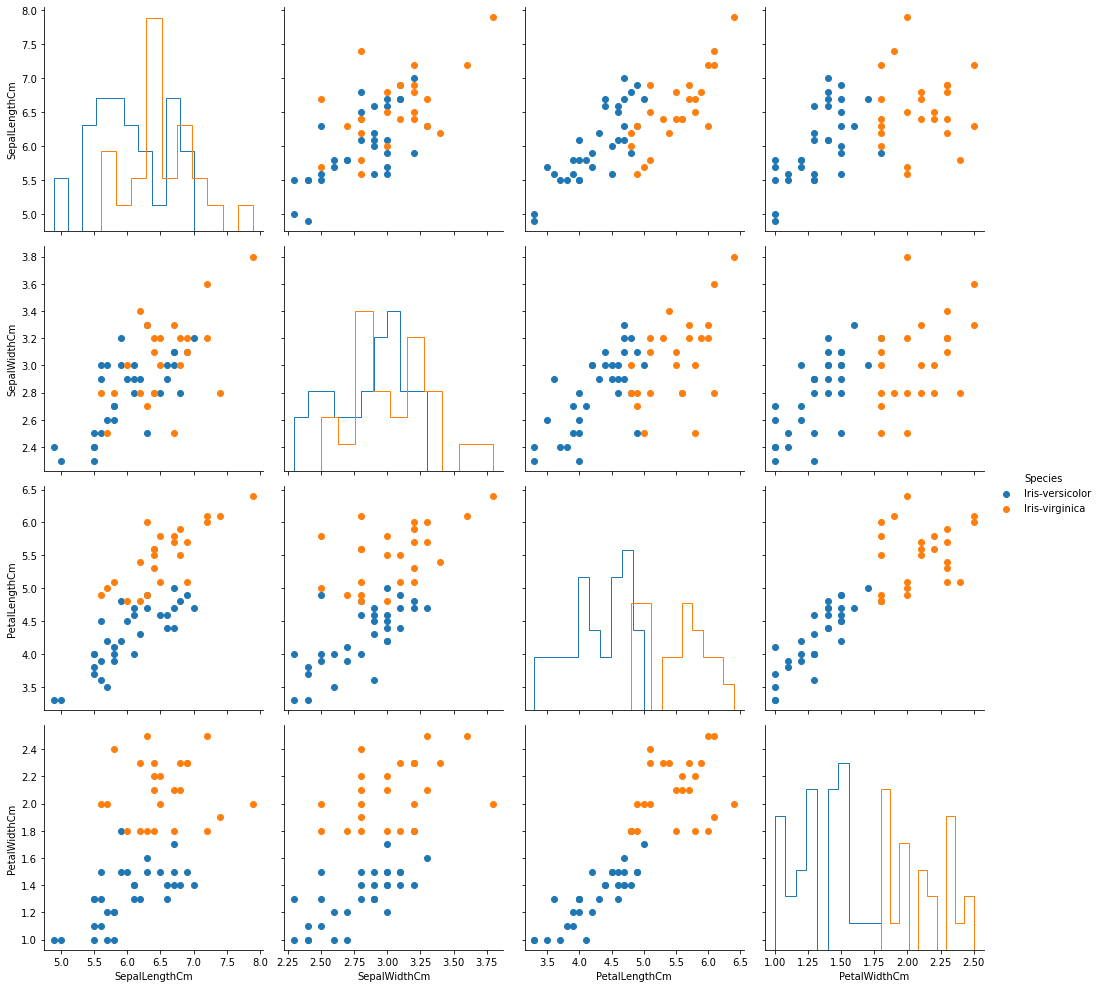

In [42]:
# Reprise des graphiques, en se limittant aux données du sous-arbre '???'

g = sns.PairGrid(train_2,hue='Species', height = 3.5)
g = g.map_diag(plt.hist, histtype="step")
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

On note ici qu'il est vraiment difficile de determiner la meilleure façon de classer car aucune coupe verticale semble nettement meilleure que les autres, aucune coupe diagonale semble resoudre le problème.

# Recherche de meilleure coupe

On va rechercher parmi tous les attributs celui qui semble permettre la meilleure séparation entre les deux variétés d'iris restantes. Pour cela, on va envisager une coupe selon n'importe quel attribut, et pour n'importe quelle valeur de seuil, puis on réalisera un balayage des coupes verticales possibles, et on conservera la moins mauvaise.

Pour cela, on va écrire une fonction *separe* prenant comme entrées :
- un attribut 'att'
- un seuil
- une étiquette 'A'
- une étiquette 'B'

qui renvoie une fonction qui prend en entrée une situation et qui renvoie 'A' si cette situation a sont attribut *att < seuil* et 'B' sinon


In [43]:
def separe(att, seuil, A, B):
    if( att == 'SepalLengthCm'):
        for i in range(0, len(train_2)):
            if (train_2.iloc[i].SepalLengthCm < seuil):
                A.append(i)
            else:
                B.append(i)
        return 
    if( att == 'SepalWidthCm'):
        for i in range(0, len(train_2)):
            if (train_2.iloc[i].SepalWidthCm < seuil):
                A.append(i)
            else:
                B.append(i)
        return 
    if( att == 'PetalLengthCm'):
        for i in range(0, len(train_2)):
            if (train_2.iloc[i].PetalLengthCm < seuil):
                A.append(i)
            else:
                B.append(i)
        return 
    if( att == 'PetalWidthCm'):
        for i in range(0, len(train_2)):
            if (train_2.iloc[i].PetalWidthCm < seuil):
                A.append(i)
            else:
                B.append(i)
        return 


Cette fonction prend en parametre le nom de l'attribut, un seuil et 2 liste A et B
Puis verifie de quel attribut il s'agit pour ensuite grace au seuil divisée les données en A et B contenant leurs indices dans train_2

Ensuite, on écrit une fonction de *balayage* qui renvoie un tuple(attribut, seuil, A, B) qui permettra de maximiser le taux de prédiction.

In [44]:
def niveau1_d ():
    
    Maxpredic = 0
    
    Maxpredic1 = 0
    seuil1 = 0
    for i in np.arange(0.0, 8.25,0.25):
        A1 = []
        B1 = []
        att1 = 'SepalLengthCm'
        separe(att1, i, A1, B1)
        VP1 = 0
        VN1 = 0
        
        for j in range (0, len(A1)):
            if(train_2.iloc[A1[j]].Species == 'Iris-versicolor'):
                VP1 = VP1 + 1
        for j in range (0, len(B1)):
            if(train_2.iloc[B1[j]].Species == 'Iris-virginica'):
                VN1 = VN1 + 1
        if(Maxpredic1 <= VP1 + VN1 / len(train_2)):
            Maxpredic1 = VP1 + VN1 / len(train_2)
            seuil1 = i
    
    if(Maxpredic1 >= Maxpredic):
        att = att1
        A = list(A1)
        B = list(B1)
        seuil = seuil1
        Maxpredic = Maxpredic1
    
    Maxpredic2 = 0
    seuil2 = 0
    for i in np.arange(0.0, 4.5,0.25):
        A2 = []
        B2 = []
        att2 = 'SepalWidthCm'
        separe(att2, i, A2, B2)
        VP2 = 0
        VN2 = 0
        
        for j in range (0, len(A2)):
            if(train_2.iloc[A2[j]].Species == 'Iris-versicolor'):
                VP2 = VP2 + 1
        for j in range (0, len(B)):
            if(train_2.iloc[B2[j]].Species == 'Iris-virginica'):
                VN2 = VN2 + 1
        if(Maxpredic2 <= VP2 + VN2 / len(train_2)):
            Maxpredic2 = VP2 + VN2 / len(train_2)
            seuil2 = i
            
    if(Maxpredic2 >= Maxpredic):
        att = att2
        A = list(A2)
        B = list(B2)
        seuil = seuil2
        Maxpredic = Maxpredic2
    
    Maxpredic3 = 0
    seuil3 = 0
    for i in np.arange(0.0, 7.0,0.5):
        A3 = []
        B3 = []
        att3 = 'PetalLengthCm'
        separe(att3, i, A3, B3)
        VP3 = 0
        VN3 = 0
        
        for j in range (0, len(A3)):
            if(train_2.iloc[A3[j]].Species == 'Iris-versicolor'):
                VP3 = VP3 + 1
        for j in range (0, len(B3)):
            if(train_2.iloc[B3[j]].Species == 'Iris-virginica'):
                VN3 = VN3 + 1
        if(Maxpredic3 <= VP3 + VN3 / len(train_2)):
            Maxpredic3 = VP3 + VN3 / len(train_2)
            seuil3 = i
    
    if(Maxpredic3 >= Maxpredic):
        att = att3
        A = list(A3)
        B = list(B3)
        seuil = seuil3
        Maxpredic = Maxpredic3
    
    Maxpredic4 = 0
    seuil4 = 0
    for i in np.arange(0.0, 3.0,0.125):
        A4 = []
        B4 = []
        att4 = 'PetalWidthCm'
        separe(att4, i, A4, B4)
        VP4 = 0
        VN4 = 0
        
        for j in range (0, len(A4)):
            if(train_2.iloc[A4[j]].Species == 'Iris-versicolor'):
                VP4 = VP4 + 1
        for j in range (0, len(B4)):
            if(train_2.iloc[B4[j]].Species == 'Iris-virginica'):
                VN4 = VN4 + 1
        if(Maxpredic4 <= VP4 + VN4 / len(train_2)):
            Maxpredic4 = VP4 + VN4 / len(train_2)
            seuil4 = i
    
    if(Maxpredic4 >= Maxpredic):
        att = att4
        A = list(A4)
        B = list(B4)
        seuil = seuil4
        Maxpredic = Maxpredic4
    
    return att, seuil, A, B

attribut = ''
seuil = 0
A = []
B = []
attribut, seuil, A, B = niveau1_d()
display(attribut)##attribut qui donne la meilleur separation
display(seuil)##son seuil

'PetalWidthCm'

1.875

Cette fonction fait varier pour chaque attribut son seuil de sa plus petite valeur de données à sa plus grande. Puis grace à la fonction separe(), on obtient les listes A et B qui representent Iris-versicolor et Iris-virginica.
Puis on calcule la accuracy maximal avec les Vrai Positif et Vrai Negatif.

# Construction du classificateur chainant les deux premiers classificateurs

On nomme **arbre** la fonction permettant de d'enchainer les deux fonction **niveau0** et **niveau1_d**.

In [45]:
def arbre(X):
    
    setosa = pd.DataFrame({'Resultats': ['Iris-setosa']})
    versicolor = pd.DataFrame({'Resultats': ['Iris-versicolor']})
    virginica = pd.DataFrame({'Resultats': ['Iris-virginica']})
    
    n = pd.DataFrame({'Resultats': []})
    n = n.append(niveau0(X), ignore_index = True)
    if(n.equals(setosa)):
        return setosa
    
    attribut = ''
    seuil = 0
    A = []
    B = []
    attribut, seuil, A, B = niveau1_d()

    if(attribut == 'PetalWidthCm'):
        if(X.PetalWidthCm <= seuil):
            return versicolor
        else :
            return virginica
    if(attribut == 'PetalLengthCm'):
        if(X.PetalLengthCm <= seuil):
            return versicolor
        else :
            return virginica
    if(attribut == 'SepalWidthCm'):
        if(X.PetalWidthCm <= seuil):
            return versicolor
        else :
            return virginica
    if(attribut == 'SepalLengthCm'):
        if(X.PetalWidthCm <= seuil):
            return versicolor
        else :
            return virginica
    

abrt = pd.DataFrame({'Resultats': []})
for i in range(0, len(test_X)):
    abrt = abrt.append(arbre(test_X.iloc[i]),ignore_index = True)

## le dataframme t contient les test_Y et ce que arbre a prédit
t = test_Y.copy()
t.reset_index(drop = True, inplace = True)
t['arbre'] = abrt.copy()    

abrv = pd.DataFrame({'Resultats': []})
for i in range(0, len(validation_X)):
    abrv = abrv.append(arbre(validation_X.iloc[i]),ignore_index = True)

## le dataframme v contient les validation_Y et ce que arbre a prédit
v = validation_Y.copy()
v.reset_index(drop = True, inplace = True)
v['arbre'] = abrv.copy()
    
display(v)
display(t)

Species            arbre
0    Iris-virginica   Iris-virginica
1       Iris-setosa      Iris-setosa
2       Iris-setosa      Iris-setosa
3       Iris-setosa      Iris-setosa
4   Iris-versicolor  Iris-versicolor
5   Iris-versicolor  Iris-versicolor
6       Iris-setosa      Iris-setosa
7   Iris-versicolor  Iris-versicolor
8       Iris-setosa      Iris-setosa
9   Iris-versicolor  Iris-versicolor
10  Iris-versicolor  Iris-versicolor
11      Iris-setosa      Iris-setosa
12      Iris-setosa      Iris-setosa
13   Iris-virginica  Iris-versicolor
14      Iris-setosa      Iris-setosa
15   Iris-virginica  Iris-versicolor
16   Iris-virginica   Iris-virginica
17  Iris-versicolor  Iris-versicolor
18   Iris-virginica  Iris-versicolor
19      Iris-setosa      Iris-setosa
20  Iris-versicolor  Iris-versicolor
21      Iris-setosa      Iris-setosa
22  Iris-versicolor  Iris-versicolor

Species            arbre
0    Iris-virginica   Iris-virginica
1    Iris-virginica   Iris-virginica
2   Iris-versicolor  Iris-versicolor
3    Iris-virginica   Iris-virginica
4       Iris-setosa      Iris-setosa
5    Iris-virginica   Iris-virginica
6   Iris-versicolor  Iris-versicolor
7    Iris-virginica  Iris-versicolor
8   Iris-versicolor  Iris-versicolor
9   Iris-versicolor  Iris-versicolor
10      Iris-setosa      Iris-setosa
11   Iris-virginica   Iris-virginica

## Evaluation des differentes mesures



In [46]:
import sklearn.metrics as skm
#matrice de confusion : 
display(skm.confusion_matrix(v.Species, v.arbre))

#taux de bonne prediction :
display(skm.accuracy_score(v.Species, v.arbre))

#taux de vrai positif:
display(skm.recall_score(v.Species, v.arbre, average  = 'macro'))

#precision :
display(skm.precision_score(v.Species, v.arbre, average = 'macro'))

#F_1 mesure : 
display(skm.f1_score(v.Species, v.arbre, average = 'macro'))

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  3,  2]])

0.8695652173913043

0.7999999999999999

0.9090909090909092

0.8045112781954887

## Arbre de décision 

En fin on crée un classificateur en utilisant l'indice de Gini.

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf  = DecisionTreeClassifier()
tree = clf.fit(train_X, train_Y)
predi_y = clf.predict(test_X)
print("Accurancy", skm.accuracy_score(test_Y, predi_y))

Accurancy 1.0
